$$$$$ Fetch Data ...
$$$$$ Plot Data ...


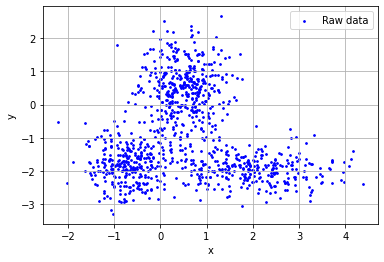

For n_clusters= 2 Avg silhouette_score is 0.5679
For n_clusters= 3 Avg silhouette_score is 0.5771
For n_clusters= 4 Avg silhouette_score is 0.5506
For n_clusters= 5 Avg silhouette_score is 0.5416
For n_clusters= 6 Avg silhouette_score is 0.5202
For n_clusters= 7 Avg silhouette_score is 0.5375
For n_clusters= 8 Avg silhouette_score is 0.5478
For n_clusters= 9 Avg silhouette_score is 0.5454


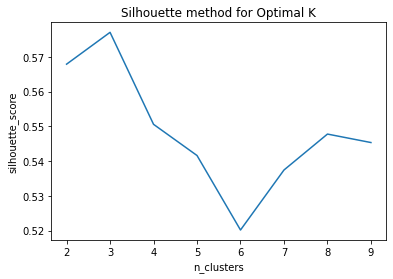


$$$ Highest silhouette score points to k=3 as the best n_clusters


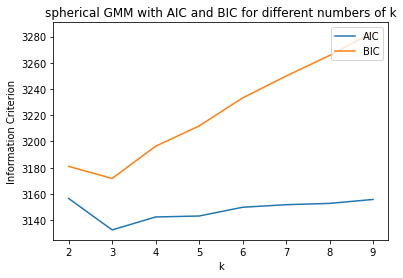

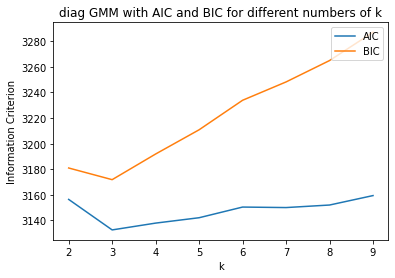

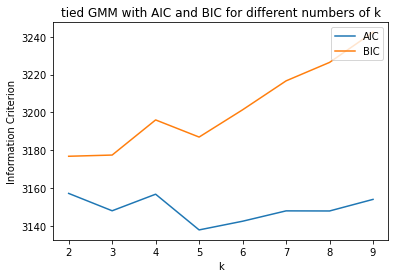

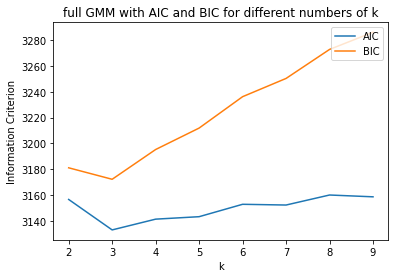

BIC and AIC also have their minimum at k = 3


In [15]:
#Each data point has two features. we do not know anything about how many clusters to expect in this data.
import numpy as np
import matplotlib.pyplot as plt

print('$$$$$ Fetch Data ...')
data_ = np.loadtxt('cluster2.csv', delimiter=',')
np.random.seed(69) # The sequence is dictated by the random seed, which starts the process
np.random.shuffle(data_)
X = data_[:,:1].reshape(-1,1)
y = data_[:,-1].reshape(-1,1)
print('$$$$$ Plot Data ...')
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', marker='o', label='Raw data', s=3)
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.legend()
plt.grid()
plt.show()

# To choose an appropriate number of clusters

# 1st approach: With k-Means, we use the silhouette score to select the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

arr = []
# A perspective into the density and separation of the formed clusters
for n_clusters in range(2,10): # silhouette_score requires more than 1 cluster labels.
    clf = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = clf.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    arr.append(silhouette_avg)
    print("For n_clusters=", n_clusters, "Avg silhouette_score is %.4f" %silhouette_avg)

plt.plot(range(2,10),arr)
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.title('Silhouette method for Optimal K')
plt.show()
print("\n$$$ Highest silhouette score points to k=3 as the best n_clusters")

# 2nd approach: With GMMs we can try to find the model that minimizes a theoretical information criterion, such as “AIC” or “BIC”.
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

for cov_type in ['spherical','diag', 'tied', 'full']:
    K = range(2,10)
    Sum_bic = [] # An estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup
    Sum_aic = [] # A constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model
    for k in K:
        gmm = GMM(n_components=k,covariance_type=cov_type)
        gmm = gmm.fit(X)
        Sum_bic.append(gmm.bic(X))
        Sum_aic.append(gmm.aic(X))

    plt.plot(K, Sum_aic, label = "AIC")
    plt.plot(K, Sum_bic, label = "BIC")
    plt.title(cov_type+" GMM with AIC and BIC for different numbers of k")
    plt.xlabel("k")
    plt.ylabel("Information Criterion")
    plt.legend(loc='upper right')
    plt.show()
    
# Exclusing tied (maybe a bug in scikitlearn?)
# cov_type "Spherical", "full" and "diagonal" types have similar results
# I can then confidently choose 3 as the number of clusters.
print("BIC and AIC also have their minimum at k = 3")


$$$$ covariance_type:  spherical
GMM Covariance:  [0.3274779  0.43658835 0.35832377]


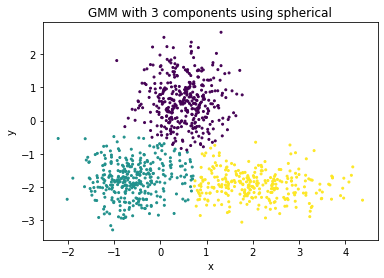


$$$$ covariance_type:  diag
GMM Covariance:  [[0.22678861 0.61869353]
 [0.82976456 0.15883135]
 [0.2180558  0.30298006]]


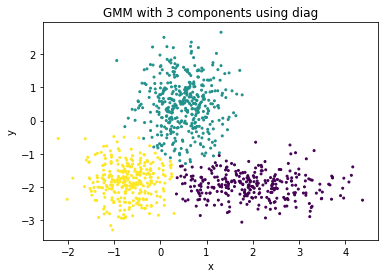


$$$$ covariance_type:  tied
GMM Covariance:  [[0.39918035 0.00150084]
 [0.00150084 0.34365053]]


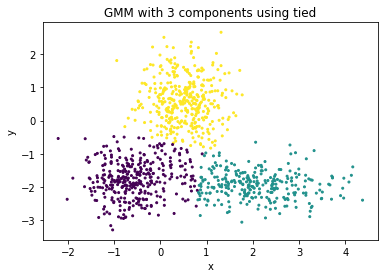


$$$$ covariance_type:  full
GMM Covariance:  [[[ 0.85005824 -0.03325453]
  [-0.03325453  0.16137472]]

 [[ 0.22623061 -0.00421739]
  [-0.00421739  0.60454372]]

 [[ 0.21607117  0.00337051]
  [ 0.00337051  0.3072582 ]]]


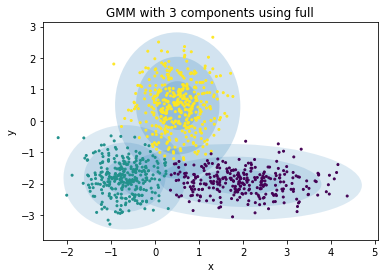

In [16]:
#
# Since I do not know how many clusters to expect in cluster2.csv data.
# With k-Means, I used the silhouette score to select the appropriate number of clusters.
# But with GMM, these scores are not reliable when clusters are not spherical or have different sizes.
# For that reason I tried to minimize a theoretical information criterion, such as “AIC” or “BIC”.
# Both approaches result in K = 3 as the optimal n_clusters.

# Try GMMs using different types of covariances.
clf = {cov_type: GMM(n_components=3, covariance_type=cov_type)
        for cov_type in ['spherical','diag', 'tied', 'full']}

def draw_ellipse(position, covariance, alfa):
    ax = plt.gca()
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
    # Add ellipses to plot.
    for l in range(1, 4):
        ax.add_patch(Ellipse(position, l * width, l * height, angle, alpha=alfa))

def plot_gmm(gmm, name):
    ax = plt.gca()
    clusters = gmm.fit(data_).predict(data_)
    ax.scatter(X, y, c=clusters, s=4, cmap='viridis', zorder=2)
    if name == 'full':
        w_ = 0.2 / gmm.weights_.max()
        for pos, covar, weight in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, weight * w_)
    # Plot clusters
    plt.title("GMM with 3 components using "+name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# To account for elliptical clusters much like the reasoning in Task 1, I will fit the data using GMM to distinguish the clusters.
for name,gmm in clf.items():
    gmm.fit(data_)
    print("\n$$$$ covariance_type: ",name)
    print("GMM Covariance: ", gmm.covariances_)
    plot_gmm(gmm,name)